## Нищук Р. С. ИУ5-21М

## <strong>Вариант 11</strong>

Каждая задача предполагает использование набора данных. 

Набор данных выбирается Вами произвольно с учетом следующих условий:

- Вы можете использовать один набор данных для решения всех задач, или решать каждую задачу на своем наборе данных.

- Набор данных должен отличаться от набора данных, который использовался в лекции для решения рассматриваемой задачи.

- Вы можете выбрать произвольный набор данных (например тот, который Вы использовали в лабораторных работах) или создать собственный набор данных (что актуально для некоторых задач, например, для задач удаления псевдоконстантных или повторяющихся признаков).

- Выбранный или созданный Вами набор данных должен удовлетворять условиям поставленной задачи. Например, если решается задача устранения пропусков, то набор данных должен содержать пропуски.


Номер задачи №1 - 11

Номер задачи №2 - 31

# Задача №11.
Для набора данных проведите устранение пропусков для одного (произвольного) категориального признака с использованием метода заполнения отдельной категорией для пропущенных значений.

# Задача №31.
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), прямой алгоритм (sequential forward selection).

# Дополнительные требования:
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

## Загрузка и первичный анализ данных

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:

data = pd.read_csv('dataGDP.csv', sep=",")

In [106]:
data.head(5)

,num,year,emp,wage,wage2,cap,n,w,w2,filler,rec,yearm1,id
0,1,1977,5.04099988937378,13.1516,NaN,0.589399993419647,1.617604,2.576543,2.061235,NaN,1,1977,1
1,2,1978,5.59999990463257,12.3018,NaN,0.6317999958992,1.722767,2.509746,2.007796,NaN,2,1977,1
2,3,1979,5.0149998664856,12.8395,NaN,0.677100002765656,1.612433,2.552526,2.042021,NaN,3,1978,1
3,4,1980,4.71500015258789,13.8039,NaN,0.61710000038147,1.550749,2.624951,2.099961,NaN,4,1979,1
4,5,1981,4.09299993515015,14.2897,NaN,0.507600009441376,1.409278,2.659539,2.127631,NaN,5,1980,1


[Датасет] Составлен лично из открытых источников по финансовой ситуации и ВВП разных стран

Информация об атрибутах:

* num: номер записи начиная с 1

*	year: год

*	emp: employee - сотрудники

*	wage: заработная плата

*	wage2: надбавка к заработной плате

*	cap: капитал

*	n: ln(emp) - натуральный логарифм переменной emp для подсчёта линейной и GMM-регрессии

*	w: ln(emp) - натуральный логарифм переменной wage для подсчёта линейной и GMM-регрессии

* w2: ln(emp) - натуральный логарифм переменной cap для подсчёта линейной и GMM-регрессии

*	filler: пустой столбец для задания 11

*	yearm1: первый год для регрессионной модели (как правило сдвиг по столбцу на 1. Пример в первых двух строках)

*	id: идентификационный номер страны. 1 = Австралия, 2 = Австрия и т.д. Полный список стран имеется у студента.

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   num     1031 non-null   int64  
 1   year    1031 non-null   int64  
 2   emp     1031 non-null   object 
 3   wage    1031 non-null   float64
 4   wage2   0 non-null      float64
 5   cap     1031 non-null   object 
 6   n       1031 non-null   float64
 7   w       1031 non-null   float64
 8   w2      1031 non-null   float64
 9   filler  0 non-null      float64
 10  rec     1031 non-null   int64  
 11  yearm1  1031 non-null   int64  
 12  id      1031 non-null   int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 104.8+ KB


In [108]:
data.describe()

,num,year,wage,wage2,n,w,w2,filler,rec,yearm1,id
count,1031.000000,1031.000000,1031.000000,0.0,1031.000000,1031.000000,1031.000000,0.0,1031.000000,1031.000000,1031.000000
mean,516.000000,1979.650824,23.918803,NaN,1.056002,3.142988,2.514390,NaN,516.000000,1979.644035,73.203686
std,297.768366,2.216070,5.648418,NaN,1.341506,0.263008,0.210406,NaN,297.768366,2.213454,41.233331
min,1.000000,1976.000000,8.017100,NaN,-2.263364,2.081577,1.665261,NaN,1.000000,1976.000000,1.000000
25%,258.500000,1978.000000,20.636450,NaN,0.165938,3.027059,2.421647,NaN,258.500000,1978.000000,37.000000
50%,516.000000,1980.000000,24.006001,NaN,0.827241,3.178304,2.542643,NaN,516.000000,1980.000000,74.000000
75%,773.500000,1981.000000,27.493600,NaN,1.948761,3.313953,2.651163,NaN,773.500000,1981.000000,110.000000
max,1031.000000,1984.000000,45.231800,NaN,4.687321,3.811800,3.049440,NaN,1031.000000,1984.000000,140.000000


# Задача №11.
Для набора данных проведите устранение пропусков для одного (произвольного) категориального признака с использованием метода заполнения отдельной категорией для пропущенных значений.


In [109]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1031


In [110]:
data['filler'].fillna('Not Stated', inplace = True)

In [111]:
data['filler'].isna().sum()

0

In [112]:
data[data['filler'] == 'Not Stated'][['year','filler','id']]

,year,filler,id
0,1977,Not Stated,1
1,1978,Not Stated,1
2,1979,Not Stated,1
3,1980,Not Stated,1
4,1981,Not Stated,1
...,...,...,...
1026,1980,Not Stated,140
1027,1981,Not Stated,140
1028,1982,Not Stated,140
1029,1983,Not Stated,140


Все пустые значения были автоматически заменены на 'Not Stated'

# Задача №31.
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), прямой алгоритм (sequential forward selection).

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
data = pd.read_csv('dataGDP.csv', sep=",")

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   num     1031 non-null   int64  
 1   year    1031 non-null   int64  
 2   emp     1031 non-null   object 
 3   wage    1031 non-null   float64
 4   wage2   0 non-null      float64
 5   cap     1031 non-null   object 
 6   n       1031 non-null   float64
 7   w       1031 non-null   float64
 8   w2      1031 non-null   float64
 9   filler  0 non-null      float64
 10  rec     1031 non-null   int64  
 11  yearm1  1031 non-null   int64  
 12  id      1031 non-null   int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 104.8+ KB


In [116]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Выберем "id" для прогнозирования

In [117]:
X = data.drop(labels = 'n', axis = 1).copy(deep = True)
Y = data['n'].copy(deep = True)
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SFS(knn, forward = True, floating = False, k_features=5)

In [ ]:
sfs.fit(X,Y)

In [119]:
sfs.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([nan, nan, nan, nan, nan]),
  'avg_score': nan,
  'feature_names': ('num',)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([nan, nan, nan, nan, nan]),
  'avg_score': nan,
  'feature_names': ('num', 'year')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([nan, nan, nan, nan, nan]),
  'avg_score': nan,
  'feature_names': ('num', 'year', 'emp')},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([nan, nan, nan, nan, nan]),
  'avg_score': nan,
  'feature_names': ('num', 'year', 'emp', 'wage')},
 5: {'feature_idx': (0, 1, 2, 3, 4),
  'cv_scores': array([nan, nan, nan, nan, nan]),
  'avg_score': nan,
  'feature_names': ('num', 'year', 'emp', 'wage', 'wage2')}}

<AxesSubplot:xlabel='n', ylabel='wage'>

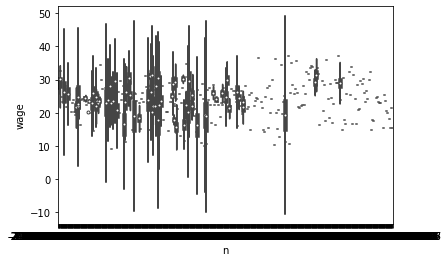

In [120]:
sns.violinplot(data = data, x = 'n', y = 'wage')

## Дополнительное задание
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

Построим диаграмму рассеяния, демонстрирующую зависимость температуры от месяца года



In [121]:
data = pd.read_csv('dataGDP.csv', sep=",")

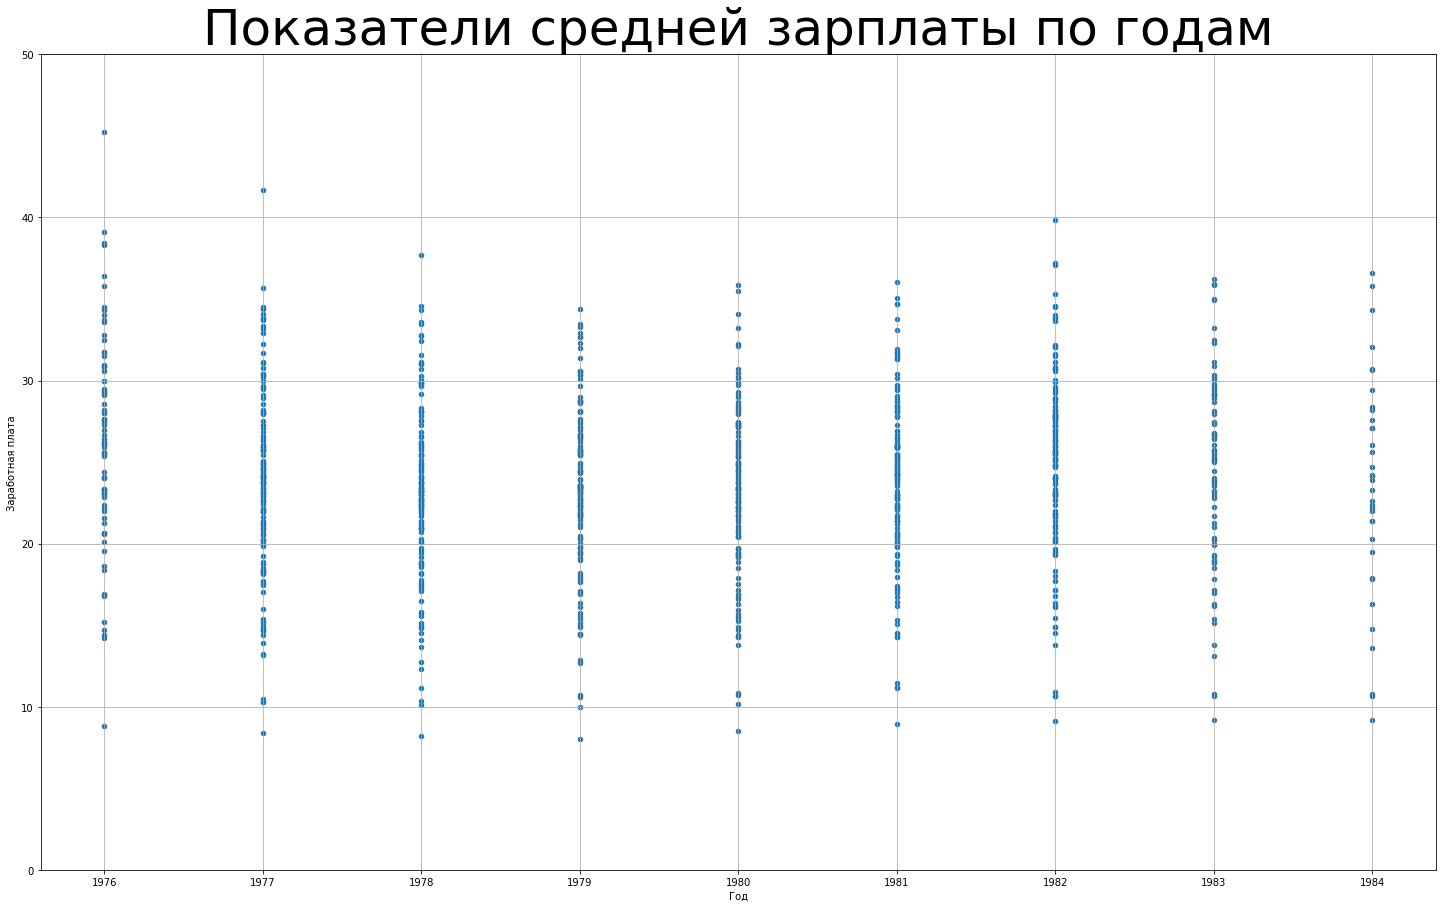

In [123]:
data.plot(x='year', y='wage', kind='scatter',  figsize=(25, 15)) ;
plt.title(f'Показатели средней зарплаты по годам', fontsize=50);
plt.ylim(0,50);
plt.ylabel('Заработная плата');
plt.xlabel('Год');
plt.grid(True);
